### Tercer parcial
## Equipo 4
# Roberto

#Problema 1.

Considere la siguiente tabla de la función $y=seno(x)$

|$x$ |$y $  |
|---|---|
|0.0|0.0000|
|0.1|0.0998|
|0.2|0.1987|
|0.3|0.2955|
|0.4|0.3894|
|0.5|0.4794|
|0.6|0.5646|
|0.7|0.6442|
|0.8|0.7174|


a) Escriba el polinomio de interpolación de Lagrange usando los nodos $0.0$, $0.1$ y $0.2$ estime el valor de $seno(2.6)$ encuentre el polinomio de lagrange agregando el punto $0.3$ y estime el valor del $seno$ en el mismo punto

b) Obtenge cotas del error de las aproximaciones obtenidas en el inciso a)


**a)** Recordando la Fórmula de Interpolación de Lagrange, se tiene que el polinomio buscado debe cumplir que

$$
p_n(x)=\sum_{i=1}^{n+1}y_il_i(x),
$$
Donde

$$
\begin{align}
l_i(x)&=\frac{(x-x_1)(x-x_2)\cdots (x-x_{i-1})(x-x_{i+1})\cdots (x-x_{n+1})}{(x_i-x_1)(x_i-x_2)\cdots (x_i-x_{i-1})(x_i-x_{i+1})\cdots (x_i-x_{n+1})}\\
 &=\prod_{\substack{j=1\\i\neq j}}^{n+1}\frac{x-x_j}{x_i-x_j}
 \end{align}
$$

Para el primer caso, aproximaremos usando $3$ nodos, para obtener un polinomio de grado $2$, que encontraremoslo encontraremos con Sympy como sigue, considerando que será de la forma $p(x)=y_0l_0+y_1l_1+y_2l_2$, en donde los $l_i$ cumplirán las fórmulas de arriba, y además $y_0=0.0000$, $y_1=0.0998$, $y_2=0.1987$.

In [1]:
import numpy as np
from sympy import *

w=symbols('x')
x=np.array([0.0, 0.1, 0.2]) # Los valores conocidos de x
y=np.array([0.0, 0.0998, 0.1987]) # Los valores conocidos de y
l0=((w-x[1])*(w-x[2]))/((x[0]-x[1])*(x[0]-x[2]))
l1=((w-x[0])*(w-x[2]))/((x[1]-x[0])*(x[1]-x[2]))
l2=((w-x[0])*(w-x[1]))/((x[2]-x[0])*(x[2]-x[1]))
print('El polinomio buscado es:')
p1=y[0]*l0+y[1]*l1+y[2]*l2
expand(p1)

El polinomio buscado es:


-0.0449999999999999*x**2 + 1.0025*x

Ahora, para aproximar el valor de $\sin(2.6)$, evaluaremos este polinomio en dicho punto, para obtener:

In [2]:
print('El valor aproximado de sin(2.6) es:', Poly(p1, w).eval(2.6))

El valor aproximado de sin(2.6) es: 2.30230000000000


In [3]:
print(np.sin(2.6))

0.5155013718214642


Ahora, aproximando con $4$ nodos obtendremos un polinomio de grado $3$, como sigue:

In [4]:
x=np.array([0.0, 0.1, 0.2, 0.3]) # Los valores conocidos de x
y=np.array([0.0, 0.0998, 0.1987, 0.2955]) # Los valores conocidos de y
l0=((w-x[1])*(w-x[2])*(w-x[3]))/((x[0]-x[1])*(x[0]-x[2])*(x[0]-x[3]))
l1=((w-x[0])*(w-x[2])*(w-x[3]))/((x[1]-x[0])*(x[1]-x[2])*(x[1]-x[3]))
l2=((w-x[0])*(w-x[1])*(w-x[3]))/((x[2]-x[0])*(x[2]-x[1])*(x[2]-x[3]))
l3=((w-x[0])*(w-x[1])*(w-x[2]))/((x[3]-x[0])*(x[3]-x[1])*(x[3]-x[2]))
p2=y[0]*l0+y[1]*l1+y[2]*l2+y[3]*l3
expand(p2)

-0.199999999999974*x**3 + 0.0149999999999935*x**2 + 0.998500000000001*x

Ahora, para aproximar el valor de $\sin(2.6)$, evaluaremos este polinomio en dicho punto, para obtener:

In [5]:
print('El valor aproximado de sin(2.6) es:', Poly(p2, w).eval(2.6))

El valor aproximado de sin(2.6) es: -0.817699999999593


In [6]:
print(np.sin(2.6))

0.5155013718214642


Como vemos, las aproximaciones no son muy buenas, y esto es debido a múltiples factores. Uno de ellos es que $2.6$ se encuentra considerablemente alejado de los nodos, y la otra es que la función $\sin x$ no tiene un comportamiento polinomial, así que esperar aproximarla con polinomios de grado $2$ y $3$ solo podría ser útil para puntos en el interior de los intervalos que indican los nodos.

A continuación analizaremos el error esperado para ver si coincide con el que estamos obteniendo.

Dado que la función $\sin x$ es infinitamente diferenciable en todos los reales, entonces podemos aplicar el teorema visto en clases, que dice lo siguiente.

**Teorema** (Error en el  polinomio de Interpolación de Lagrange): Suponga que la función $f$ es $N+1$ veces continuamente  diferenciable en $[a,b]$ que contiene los nodos $x_0,x_1,\cdots,x_n$. Sea $p$ el polinoimio de  interpolación de Lagrange. Entonces dado cualquier $x\in[a,b]$, las ($y_i=f(x_i))$
  
  $$f(x)-p(x)=\frac{(x-x_0)(x-x_1)\dots (x-x_N)}{(N+1)!}f^{(N+1)}(\xi)$$
  
  
 para alguna $\xi \in [a,b].$

Ahora, veamos que si llamamos $f(x)=\sin(x)$, entonces
$$
\begin{array}{rl}
f'(x)&=\cos(x)\\
f''(x)&=-\sin(x)\\
f'''(x)&=-\cos(x)\\
f^{(4)}(x)&=\sin(x)
\end{array}
$$
y entonces $\left\vert f'''(x)\right\vert\leq 1$, y $\left\vert f^{(4)}(x)\right\vert\leq 1$.

Así que una cota para el error de la primera aproximación estará dada por:

In [7]:
(2.6-x[0])*(2.6-x[1])*(2.6-x[2])/6

np.float64(2.6)

lo cual concuerda con el error obtenido, que fue aproximadamente

In [8]:
print(np.abs(Poly(p1, w).eval(2.6)-np.sin(2.6)))

1.78679862817854


Análogamente, una cota para el error de la segunda aproximación está dada por

In [9]:
(2.6-x[0])*(2.6-x[1])*(2.6-x[2])*(2.6-x[3])/24

np.float64(1.495)

lo cual concuerda con el error obtenido, que fue aproximadamente

In [10]:
print(np.abs(Poly(p2, w).eval(2.6)-np.sin(2.6)))

1.33320137182106


#Problema 2.

  a) Calcule el Spline cúbico natural a partir de los datos de la función $\sqrt{x}\exp{x}$ usando como datos los enteros en el intervalo $[0,8]$

 b)  compare las graficas del Spline obtenido con la de la función $\sqrt{x}\exp{x}$

Para este problema solo se requiere utilizar el código analizado en la clase de splines, el cual es el siguiente:

In [11]:
import numpy as np
def cspline(knots,data,x):
    N=np.size(knots)-1
    P=np.size(x)
    h=np.diff(knots)
    D=np.diff(data)/h
    dD3=3*np.diff(D)
    a=data[:N]
    # Se genera la matriz tridiagonal
    H=(np.diag(2*(h[:-1]+h[1:]))+np.diag(h[1:-1],1)+np.diag(h[1:-1],-1))
    c=np.zeros(N+1)
    c[1:N]=np.linalg.solve(H,dD3)
    b=D-h*(c[1:]+2*c[:-1])/3
    d=(c[1:]-c[:-1])/(3*h)
    #Se evalua el Spline  en x
    s=np.empty(P)
    for i in range(P):
        indices=np.argwhere(x[i]>knots)
        if indices.size>0:
            k=indices.flat[-1]
        elif x[i]==knots[0]:
            k=0
        else:
            raise ValueError('El Cspline no admite extrapolación ')
        z=x[i]-knots[k]
        s[i]=a[k]+z*(b[k]+z*(c[k]+z*d[k]))

    return s

Debemos generar nuestros datos, como el problema pide todos los enteros en $[0,8]$ consideraremos también a el 0 y el 8. Generamos los nodos y los datos como sigue:

In [12]:
import numpy as np
import pandas as pd
x=np.linspace(0,8,9)
y=np.sqrt(x)*np.exp(x)
d ={'x':x,'f(x)':y}
df =pd.DataFrame(d)
df

,x,f(x)
0,0.0,0.000000
1,1.0,2.718282
2,2.0,10.449703
3,3.0,34.789170
4,4.0,109.196300
5,5.0,331.861913
6,6.0,988.194692
7,7.0,2901.418617
8,8.0,8431.422428


Ahora podemos aplicar nuestro algoritmo con los $x$ y los valores $f(x)$, y realizar una tabla y una gráfica.

In [13]:
import numpy as np
import pandas as pd
x=np.linspace(0,8,9)
y=np.sqrt(x)*np.exp(x)
X=np.linspace(0,8,21)
z=np.sqrt(X)*np.exp(X)
v=cspline(x,y,X)
d ={'Nodos':X,'Valor':v}
df =pd.DataFrame(d)
df

,Nodos,Valor
0,0.0,0.000000
1,0.4,0.812214
2,0.8,1.938826
3,1.2,3.695042
4,1.6,6.414585
5,2.0,10.449703
6,2.4,16.548913
7,2.8,27.042586
8,3.2,44.632940
9,3.6,71.478940


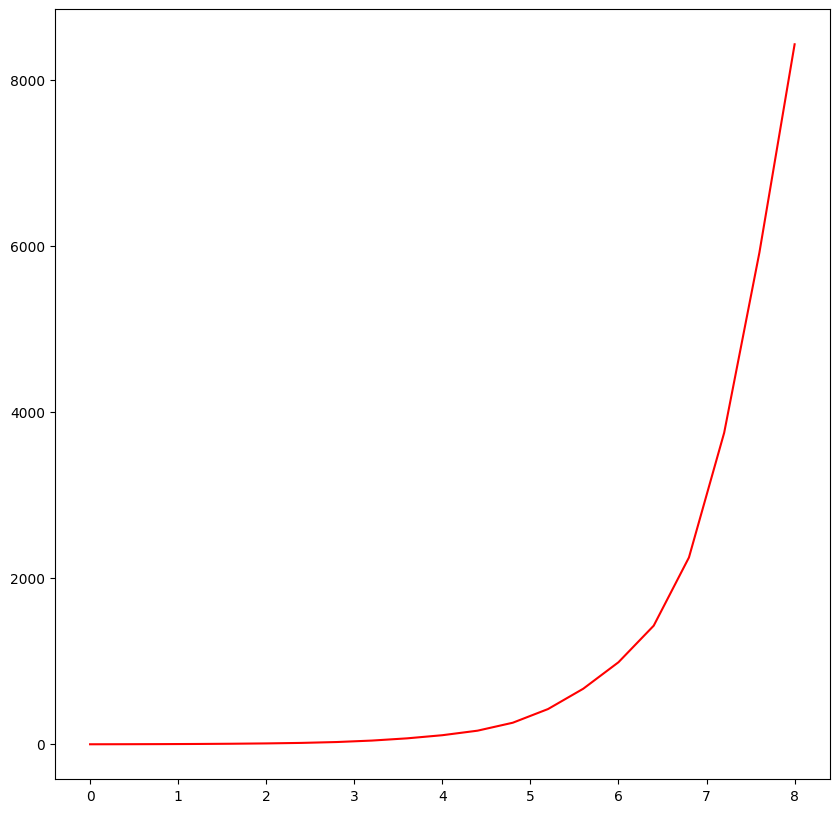

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(X,v,color='r')
plt.show()

También podemos obtener una expresión algebraica de este spline, haciendo uso de los comandos de sympy

In [15]:
from sympy import *
X=np.linspace(0,8,9)
z=np.sqrt(X)*np.exp(X)
x = symbols('x')
s=interpolating_spline(3,x,X,z)
s

Piecewise((1.26187560698106*x**3 - 1.27905697528054*x**2 + 2.73546319675853*x, (x <= 2.0) & (x >= 0)), (5.28552785400339*x**3 - 25.4209704574145*x**2 + 51.0192901610265*x - 32.1892179761786, (x >= 2.0) & (x <= 3.0)), (11.0556299147814*x**3 - 77.3518890044165*x**2 + 206.812045802033*x - 187.981973617185, (x >= 3.0) & (x <= 4.0)), (48.6827727934144*x**3 - 528.877603548013*x**2 + 2012.91490397642*x - 2596.11911784969, (x >= 4.0) & (x <= 5.0)), (79.6219627394038*x**3 - 992.965452737854*x**2 + 4333.35414992562*x - 6463.51786109837, (x >= 5.0) & (x <= 6.0)), (456.053355566772*x**3 - 7768.73052363048*x**2 + 44987.9445752813*x - 87772.6987118098, (x >= 6.0) & (x <= 8.0)))



2   b) Ahora vamos a graficar el spline y la función que queremos aproximar, junto con los nodos.


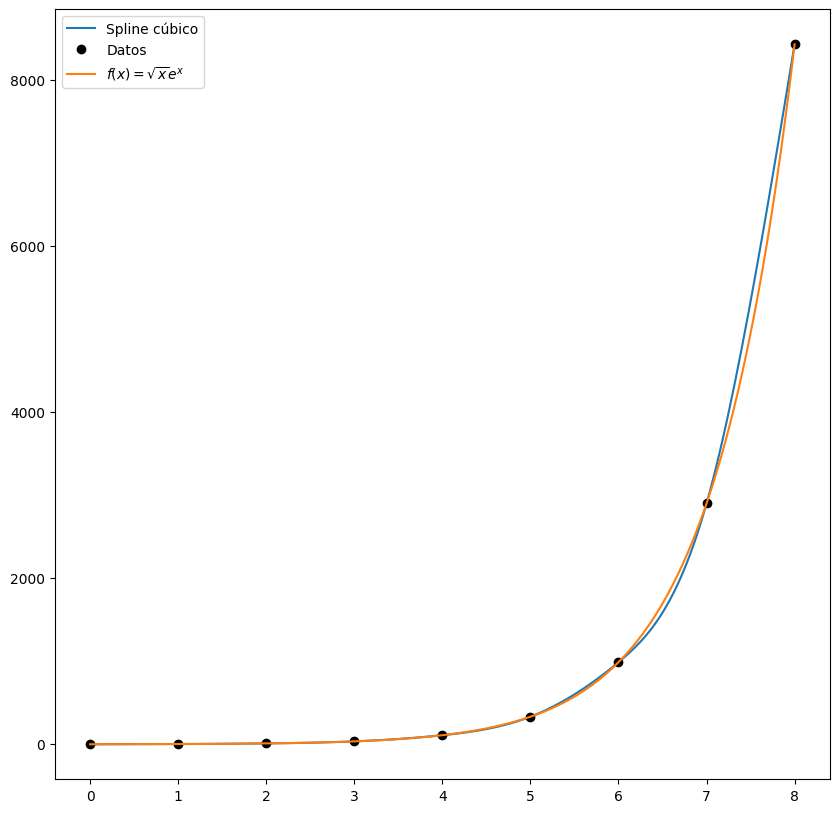

In [16]:
import matplotlib.pyplot as plt
x=np.linspace(0,8,9)
y=np.sqrt(x)*np.exp(x)
plt.figure(figsize=(10,10))
xd=np.linspace(0, 8, 200)
vd=cspline(x,y,xd)
plt.plot(xd, vd, label='Spline cúbico')
plt.plot(x, y, 'ko', label='Datos')
plt.plot(xd, np.sqrt(xd)*np.exp(xd), label=r'$f(x)=\sqrt{x}e^x$')
plt.legend()
plt.show()

Ahora una gráfica la funcion $f(x)$ menos los splines (función de error)

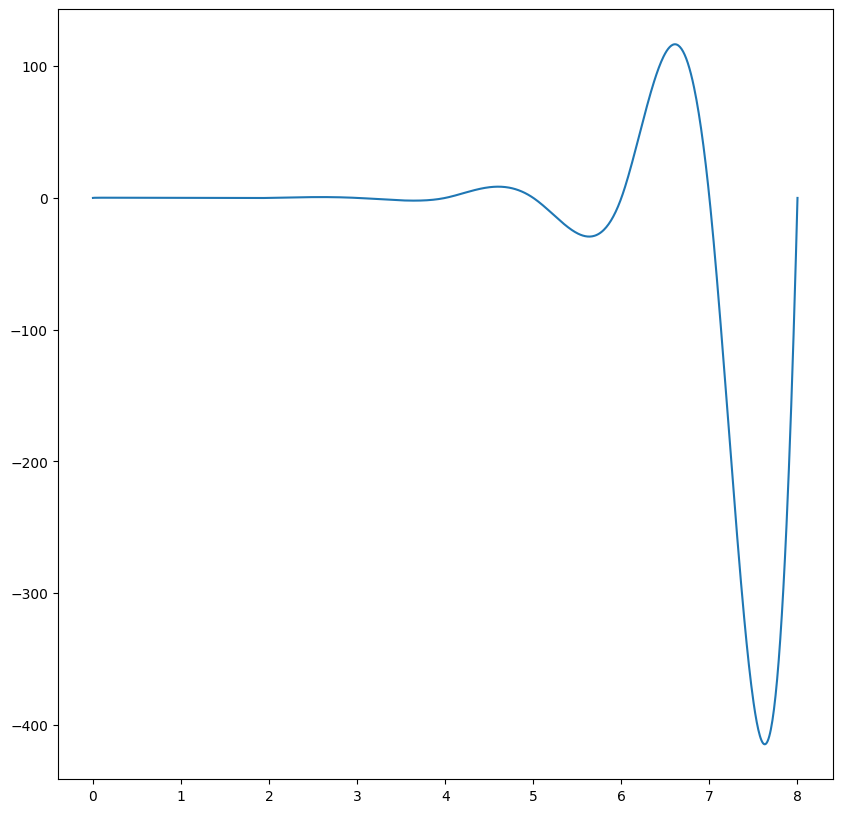

In [17]:
plt.figure(figsize=(10,10))
x=np.linspace(0,8,9)
X=np.linspace(0,8,900)
y=np.sqrt(x)*np.exp(x)
z=np.sqrt(X)*np.exp(X)
v=cspline(x,y,X)
plt.plot(X,z-v)
plt.show()

Y la función |$f(x)$ -splines|

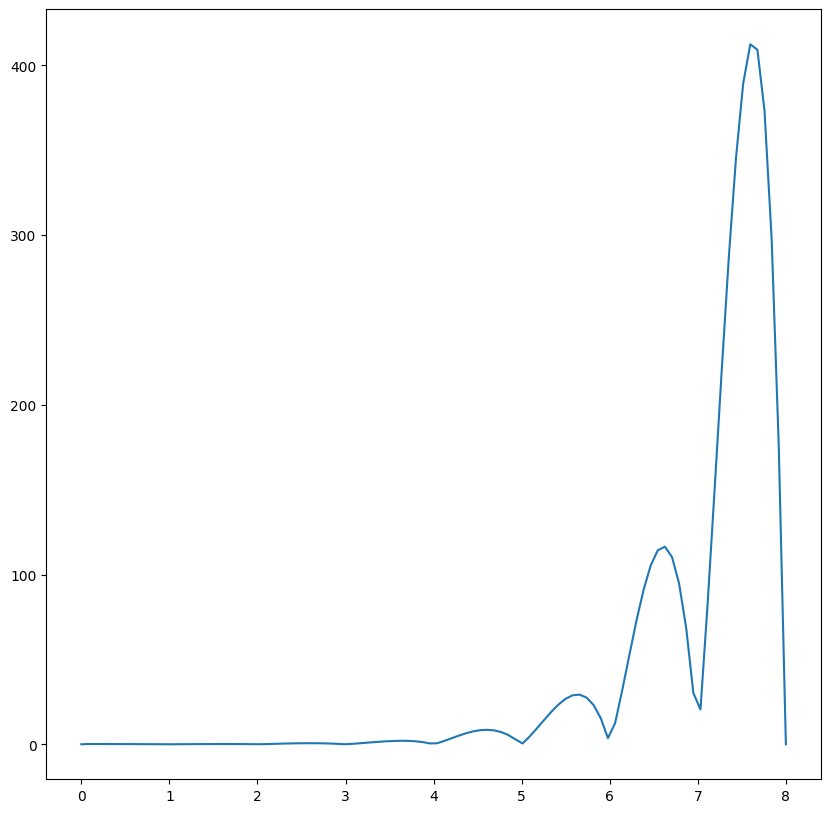

In [18]:
plt.figure(figsize=(10,10))
X=np.linspace(0,8,100)
x=np.linspace(0,8,9)
y=np.sqrt(x)*np.exp(x)
z=np.sqrt(X)*np.exp(X)
v=cspline(x,y,X)
plt.plot(X,np.abs(v-z))
plt.show()

Al analizar estas gráficas de los errores y la $f(x)$, podemos ver que las diferencias de los splines y $f(x)$ es poca hasta valores de $x$ menores a $5$ aproximadamente, a partir del cual las diferencias comienzan a ser mayores. Sin embargo, fijándonos en la tabla, podemos notar que a partir de ahí los valores de $f(x)$ empiezan a crecer considerablemente, mientras que los errores no crecen al mismo ritmo; es decir, se mantiene un error relativo similar. Para verlo en una ilustración, graficaremos los errores relativos y veamos que se mantienen "pequeños".

/tmp/ipython-input-2724353570.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(X,np.abs((v-z)/z))


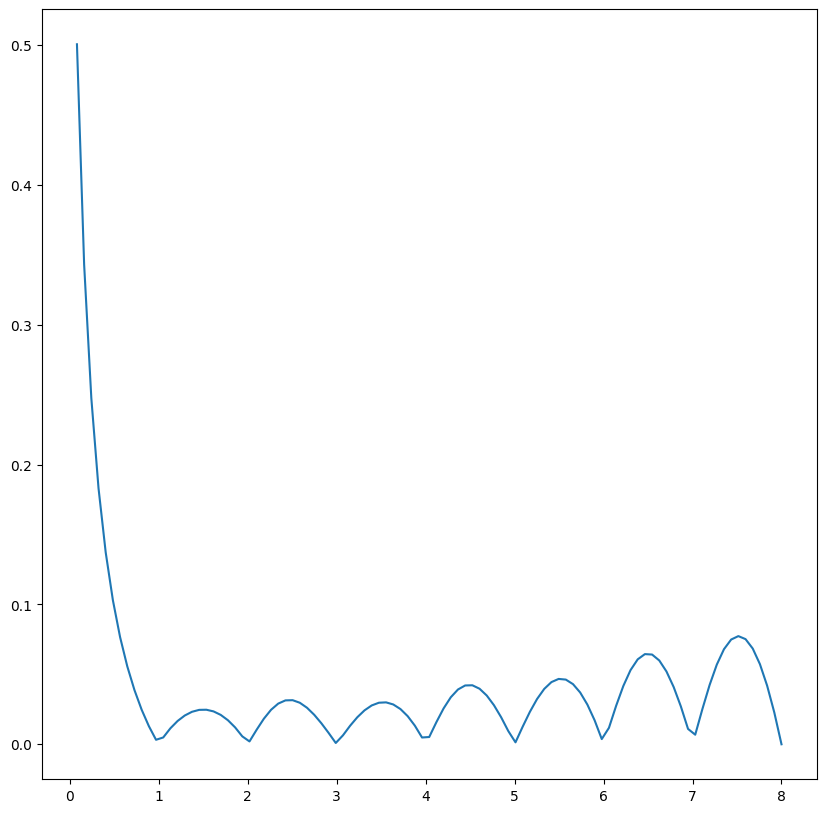

In [19]:
plt.figure(figsize=(10,10))
X=np.linspace(0,8,100)
x=np.linspace(0,8,9)
y=np.sqrt(x)*np.exp(x)
z=np.sqrt(X)*np.exp(X)
v=cspline(x,y,X)
plt.plot(X,np.abs((v-z)/z))
plt.show()

#Problema 3.
Encuentre (usando sympy) la solución de la ecuación diferencial que satisface las condiciones iniciales dadas.
$$y''-3y'+2y=0 $$
$$y(-1)=0$$
$$y'(-1)=1$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
import matplotlib.pyplot as plt


In [21]:
sympy.init_printing()

El primer paso será definir las incógnitas y la ecuación diferencial.

In [22]:
#Definimos x,y
x=sympy.Symbol('x')
y=sympy.Function('y')

#Definimos la ecuación
ode=y(x).diff(x,2)-3*y(x).diff(x)+2*y(x)
sympy.Eq(ode,0)

                       2           
           d          d            
2⋅y(x) - 3⋅──(y(x)) + ───(y(x)) = 0
           dx           2          
                      dx           

Ahora utilizando sympy.dsolve vamos a solucionar la ecuación diferencial ordinaria

In [23]:
ode_sol=sympy.dsolve(ode)
ode_sol

       ⎛         x⎞  x
y(x) = ⎝C₁ + C₂⋅ℯ ⎠⋅ℯ 

Ahora ingresaremos las condiciones iniciales para obtener la solución específica.

In [24]:
ics={y(-1):0,y(x).diff(x).subs(x,-1):1}
ics

⎧          ⎛d       ⎞│       ⎫
⎨y(-1): 0, ⎜──(y(x))⎟│    : 1⎬
⎩          ⎝dx      ⎠│x=-1   ⎭

Y sustituimos en la ecuación diferencial para obtener la solución con los respectivos valores de las constantes, con la función vista en clases, pero modificándola para que el punto inicial sea $-1$ en vez de $0$.

In [25]:
def apply_ics(sol, ics, x, known_params):
 free_params = sol.free_symbols - set(known_params)
 eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n))
.subs(x, -1).subs(ics) for n in range(len(ics))]
 sol_params = sympy.solve(eqs, free_params)
 return sol.subs(sol_params)

Así que la solución al PVI es:

In [26]:
x_t_sol=apply_ics(ode_sol,ics,x,[])
x_t_sol

       ⎛ 2  x    ⎞  x
y(x) = ⎝ℯ ⋅ℯ  - ℯ⎠⋅ℯ 

Y su gráfica es:

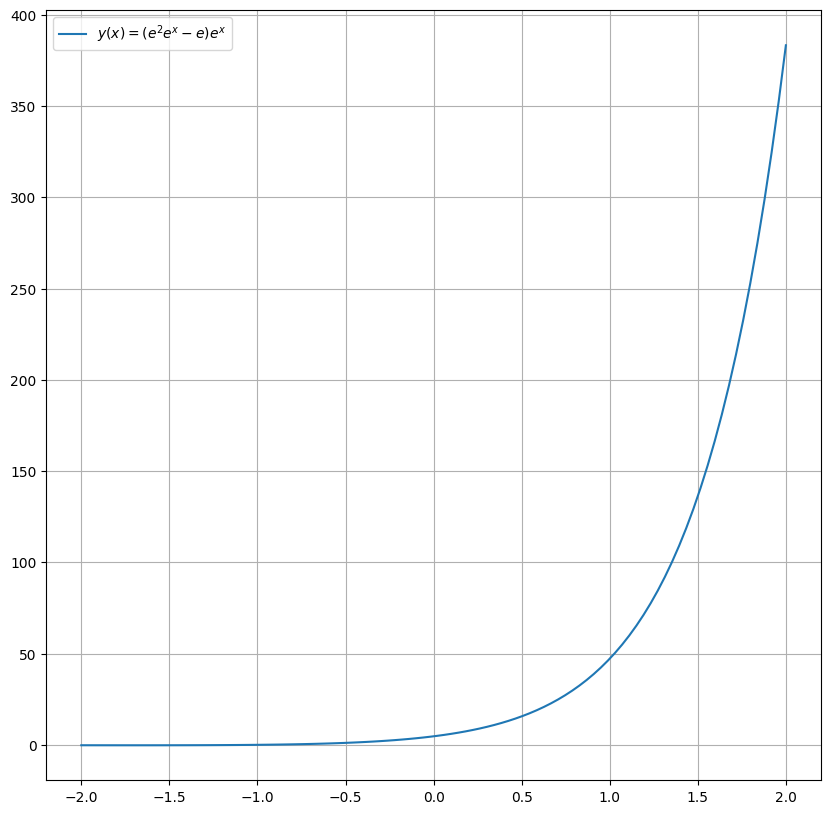

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
xd=np.linspace(-2,2,100)
yd=((np.exp(xd))*(np.exp(xd)*np.e**2-np.e))
plt.plot(xd, yd, label=r'$y{\left(x \right)} = \left(e^{2} e^{x} - e\right) e^{x}$')
plt.legend()
plt.grid()
plt.show()

#Problema 4.
Se nos pide encontrar la solución numérica de la ecuación diferencial:
$$y'=y-\sin(x)+xy$$
Bajo la condición inicial $y(0)=1$ \\
a) \\
Para ello debemos expresar la variable independiente $x$, la variable dependiente $y$ y la función $f$ que define nuestra ecuación diferencial en la forma estandar:
$$\frac{d}{dx}y(x) = f(x, y(x))$$
de forma simbólica. Esto lo podemos implementar en código de la siguiente forma

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)-sympy.sin(x)+x*y(x)
f_np = sympy.lambdify((y(x), x), f)

Una vez declaradas apropiadamente nuestras variables y funciones, empleamos la instrucción $\textbf{integrate.odeint()}$ para resolver numéricamente la ecuación diferencial.

In [29]:
y0 = 1
xp = np.linspace(-3, 3, 500)
yp = integrate.odeint(f_np, y0, xp)

Con lo cual podemos crear una tabla con las aproximaciones de la solución $y$ bajo el intervalo $[-3,3]$ como sigue:

In [30]:
import pandas as pd
yp.reshape(1,-1)
yp1=[x[0] for x in yp.tolist()]
Tp=pd.DataFrame({'x': xp, 'y(x)': yp1})
Tp

,x,y(x)
0,-3.000000,1.000000
1,-2.987976,0.978057
2,-2.975952,0.956913
3,-2.963928,0.936543
4,-2.951904,0.916924
...,...,...
495,2.951904,3512.282426
496,2.963928,3683.471501
497,2.975952,3863.563154
498,2.987976,4053.046000


b) \\
Por otro lado, debemos hallar el campo de direcciones y graficar la solución. Para el campo de direcciones empleamos la función $\textbf{plot_direction_field()}$ que tiene como argumentos el conjunto de datos para la variable independiente, la función de la variable dependiente y la función $f$.

In [31]:
def  plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):

    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')

    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')

    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)

    return ax

Finalmente, llámamos a dicha función y graficamos los datos obtenidos en el inciso a)

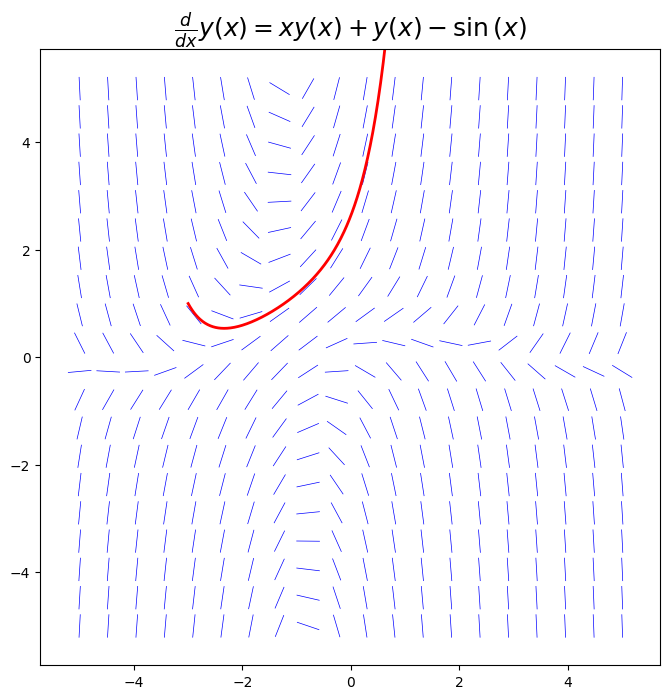

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xp, yp, 'r', lw=2)
plt.show()